# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Neste exercício, irei ultilizar gráficos estudados até então. Também irei criar a visualização dos dados e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


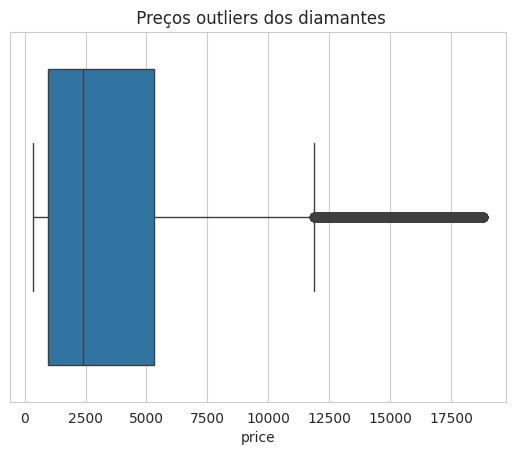

In [2]:
with sns.axes_style('whitegrid'):
    grafico = sns.boxplot(x = data ['price'])
    grafico.set(title = ' Preços outliers dos diamantes')

**Insight do gráfico 1**: o grafico sugere a existência de diamantes com preços significativamente diferentes da maioria. Isso pode indicar a presença de diamantes raros, extremamente caros, ou alternativamente, diamantes com preços abaixo da média devido a certas características. É nescessario investigar esses casos específicos para obter informações valiosas sobre fatores que influenciam os preços dos diamantes.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [7]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


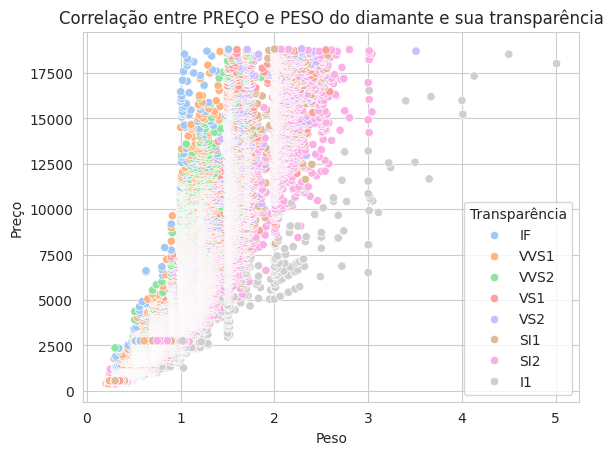

In [6]:
diamantes = data[['carat', 'clarity', 'price']]

with sns.axes_style('whitegrid'):
    grafico = sns.scatterplot(data = diamantes, x = 'carat', y = 'price', hue = 'clarity', palette = 'pastel')
    grafico.set(title= 'Correlação entre PREÇO e PESO do diamante e sua transparência', xlabel = 'Peso', ylabel = 'Preço')
    grafico.get_legend().set_title('Transparência')

**Insight do gráfico 2**: Vimos que diamantes mais pesados tendem a ter preços mais alto. A coloração por transparência destaca diferentes padrões, indicando sua influência nos preços. Outliers e agrupamentos sugerem casos interessantes e fatores adicionais que influencia nos preços, posivelmente o tipo de corte.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

Ultilizei o histograma mesmo sabendo que o Bloxplot é o ideial em casos de uma cariável numérica, porém achei a leitura do histograma mais facil

In [13]:
import seaborn as sns

carros = sns.load_dataset("mpg")
carros.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


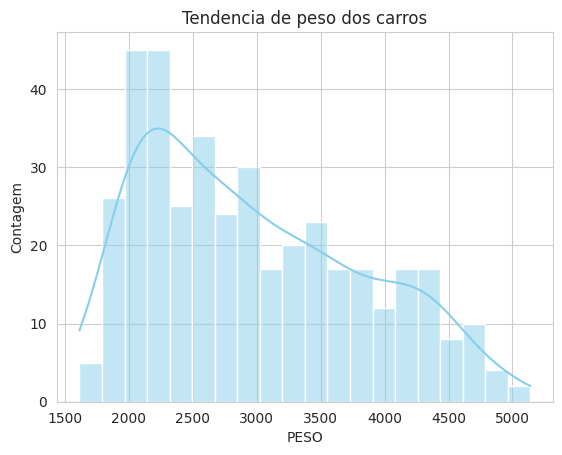

In [16]:
#carros = carros.query ('w')

with sns.axes_style('whitegrid'):

    grafico = sns.histplot(data = carros, x = 'weight', bins= 20, kde = True, color ='skyblue')
    grafico.set(title='Tendencia de peso dos carros', xlabel = 'PESO', ylabel='Contagem')


**Insight do gráfico 3**: Percebemos uma tendencia maior na faixa de peso mais comum, destacando a concentração predominante. 

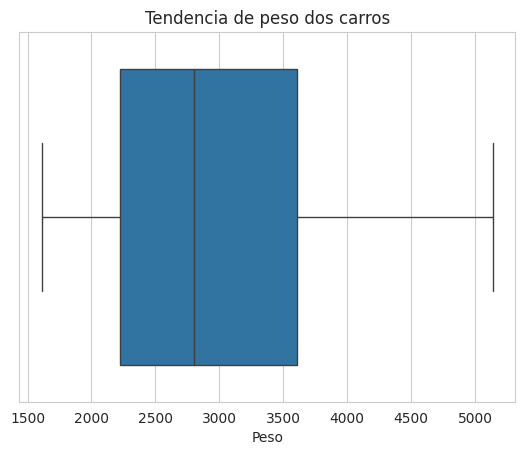

In [23]:
with sns.axes_style('whitegrid'): 
    grafico = sns.boxplot(x=carros['weight']) 
    grafico.set(title='Tendencia de peso dos carros', xlabel='Peso')

**Insight do gráfico 4** : A tendência central da distribuição de pesos dos carros, indicada pela posição da mediana, sugere que a maioria dos carros tem pesos concentrados em torno de um valor específico (Entre 2500 a 3500 ). O boxplot não mostra fortes assimetrias, o que implica uma distribuição relativamente equilibrada.

---